    Nome   ID  Idade     Gênero          Cidade          Estado     Produto  \
0  Lucas  101     52  Masculino  Rio de Janeiro  Rio de Janeiro  Assinatura   
1  Lucas  101     52  Masculino  Rio de Janeiro  Rio de Janeiro       Tênis   
2  Lucas  101     52  Masculino  Rio de Janeiro  Rio de Janeiro      Óculos   
3  Lucas  101     52  Masculino  Rio de Janeiro  Rio de Janeiro     Chinelo   
4  Lucas  102     56  Masculino       São Paulo       São Paulo        Boné   

      Valor Data_Compra  Avaliacao Pagamento  
0  R$169.55  2023-10-15  Excelente       Pix  
1  R$132.46  2023-10-03        Boa       Pix  
2  R$382.13  2023-02-25  Excelente       Pix  
3  R$262.04  2023-09-16        Boa       Pix  
4  R$487.30  2023-07-12        Boa   Crédito  

Distribuição por Gênero:
Gênero
Feminino     2148
Masculino    1331
Name: count, dtype: int64


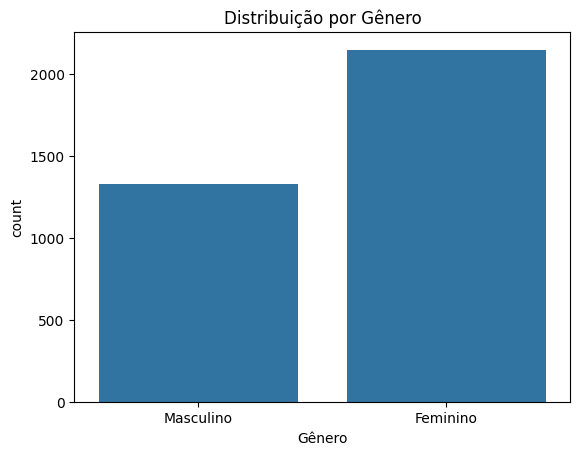

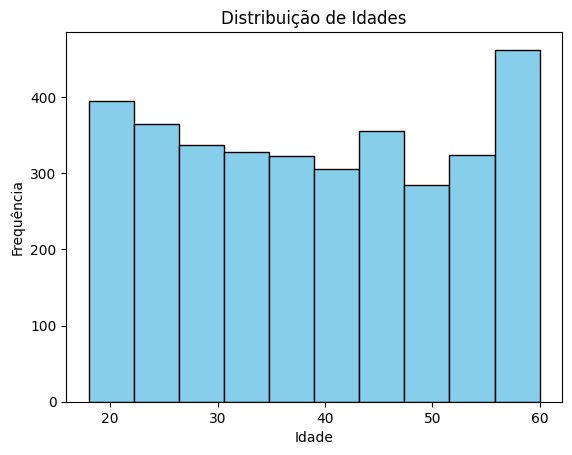


Distribuição por Método de Pagamento:
Pagamento
Pix         1363
Crédito     1054
Débito       721
Dinheiro     341
Name: count, dtype: int64


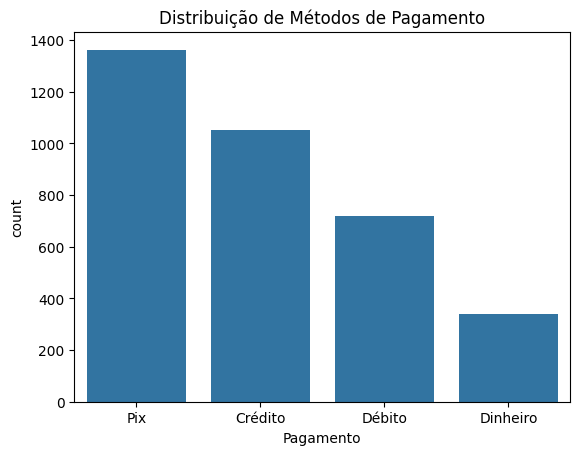


Produtos mais vendidos:
Produto
Transporte    362
Assinatura    348
Boné          279
Camiseta      265
Mochila       265
Name: count, dtype: int64


<ipython-input-4-d0c46920e4af>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=produtos_dist.head(10).index, y=produtos_dist.head(10).values, palette='viridis')


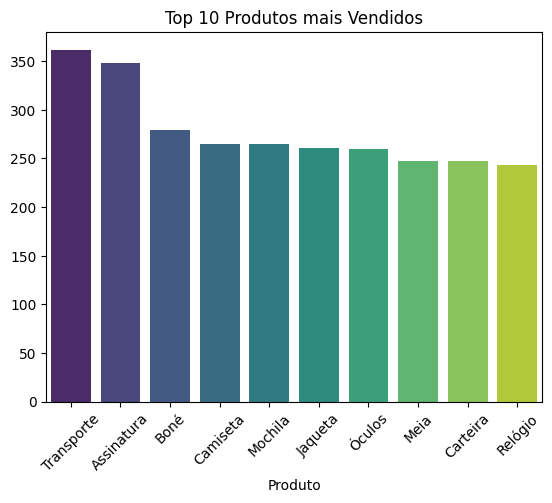


Valor médio por produto:
Produto
Chinelo       269.837261
Carteira      262.545466
Tênis         261.803096
Assinatura    261.785517
Transporte    260.913785
Name: Valor_Num, dtype: float64


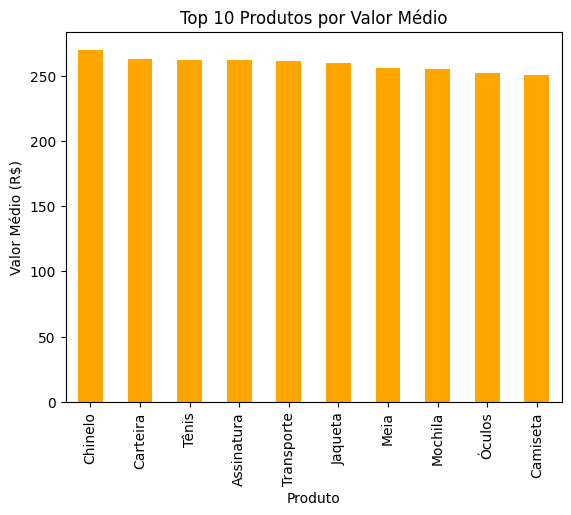


Distribuição de Avaliações:
Avaliacao
Boa          1397
Excelente    1096
Neutra        681
Ruim          215
Péssimo        90
Name: count, dtype: int64


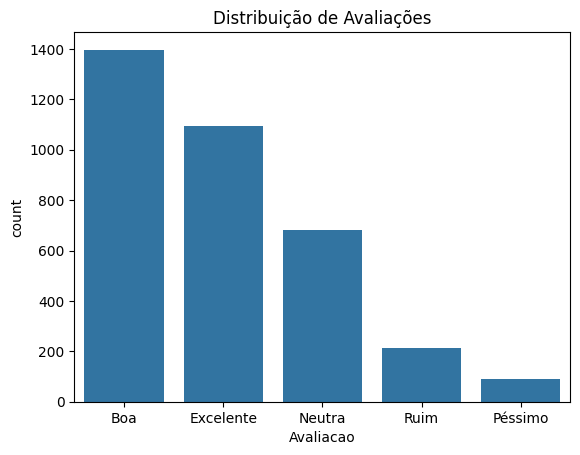

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo CSV do diretório
file_path = "https://raw.githubusercontent.com/lj1981/analisedecomportamneto/main/dataset_clientes_final.csv"
dataset = pd.read_csv(file_path)

# Visualizar as primeiras linhas do dataset
print(dataset.head())

# 1. **Distribuição por gênero**
genero_dist = dataset['Gênero'].value_counts()
print("\nDistribuição por Gênero:")
print(genero_dist)

# Plotando a distribuição
sns.countplot(x='Gênero', data=dataset)
plt.title("Distribuição por Gênero")
plt.show()

# 2. **Faixa etária**
plt.hist(dataset['Idade'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribuição de Idades")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

# 3. **Pagamentos mais usados**
pagamentos_dist = dataset['Pagamento'].value_counts()
print("\nDistribuição por Método de Pagamento:")
print(pagamentos_dist)

# Gráfico de barras para os pagamentos
sns.countplot(x='Pagamento', data=dataset, order=pagamentos_dist.index)
plt.title("Distribuição de Métodos de Pagamento")
plt.show()

# 4. **Produtos mais vendidos**
produtos_dist = dataset['Produto'].value_counts()
print("\nProdutos mais vendidos:")
print(produtos_dist.head())

# Gráfico de barras para os produtos
sns.barplot(x=produtos_dist.head(10).index, y=produtos_dist.head(10).values, palette='viridis')
plt.title("Top 10 Produtos mais Vendidos")
plt.xticks(rotation=45)
plt.show()

# 5. **Análise por valor médio**
dataset['Valor_Num'] = dataset['Valor'].replace('[R$]', '', regex=True).astype(float)
valor_medio_produto = dataset.groupby('Produto')['Valor_Num'].mean().sort_values(ascending=False)
print("\nValor médio por produto:")
print(valor_medio_produto.head())

# Gráfico dos valores médios
valor_medio_produto.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Produtos por Valor Médio")
plt.ylabel("Valor Médio (R$)")
plt.show()

# 6. **Avaliações mais comuns**
avaliacoes_dist = dataset['Avaliacao'].value_counts()
print("\nDistribuição de Avaliações:")
print(avaliacoes_dist)

# Gráfico de Avaliações
sns.countplot(x='Avaliacao', data=dataset, order=avaliacoes_dist.index)
plt.title("Distribuição de Avaliações")
plt.show()

# Insights adicionais podem ser derivados a partir dessas análises!
